In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm
import os

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
7218,Torreslfchero,AutomaticStrikeout,0,-1.0,2012.0,2012-10-16 09:05:00,'''Neutral''' - You are a great editor but in ...,1,29.650000,47
166555,Nae'blis,Rory096,-1,-1.0,2006.0,2006-10-04 02:29:00,"'''Oppose''', not because of the IRC joke in p...",2,49.883333,91
194718,GeneralPatton,Neutrality,1,1.0,2004.0,2004-10-05 04:08:00,None,4,0.000000,1
99476,Darkspots,Mattbr,1,1.0,2007.0,2007-06-26 23:54:00,'''Support''' I think that the [[CAT:CSD]] bac...,1,1.266667,7
83403,Jmlk17,Triona,-1,-1.0,2008.0,2008-02-02 22:27:00,'''Oppose''' More than half of the editing has...,1,13.216667,30


In [3]:
# Create folder for plots
if not os.path.exists('Figures'):
    os.makedirs('Figures')

# Quantity of votes through time

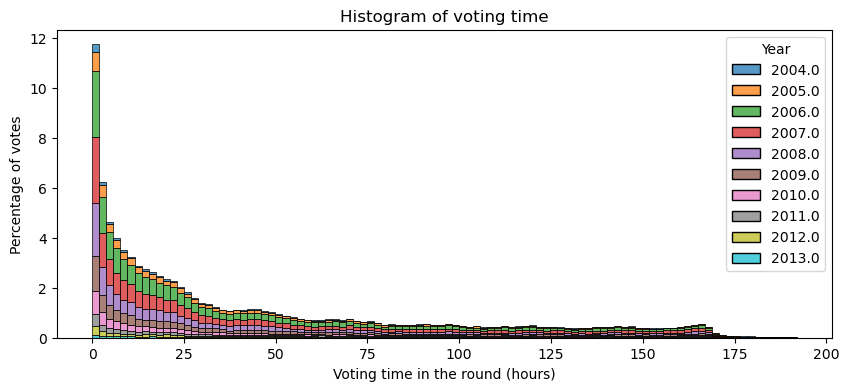

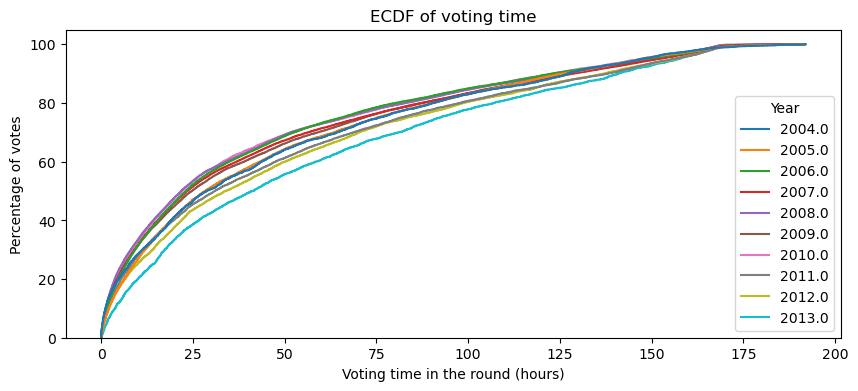

In [4]:
# Distribution of votes in round of election
pdf_voting_time(df_vote_evolution)
cdf_voting_time(df_vote_evolution)

# Evolution of votes proportions through time

In [5]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
94010,Carlosguitar,Fuhghettaboutit,1,1.0,2007.0,2007-04-08 07:07:00,"'''Support''', per (co-)nom, an experiment use...",1,2 days 04:40:00.000000001,47,0.87234
43189,MuZemike,The Earwig,1,1.0,2009.0,2009-10-11 03:03:00,'''Support''' – Another good editor I have see...,1,0 days 00:30:00,11,1.00000
163874,Steveo2,Messedrocker,-1,-1.0,2006.0,2006-05-11 19:12:00,"<b>Weak Oppose</b> Don't worry, this has nothi...",1,0 days 15:22:59.999999998,25,0.04000
195386,Seth Ilys,Rmhermen,1,1.0,2004.0,2004-07-02 04:58:00,None,1,3 days 06:03:00,19,1.00000
113118,EVula,Clamster5,1,-1.0,2007.0,2007-05-27 07:06:00,"In looking over Clamster5's edits, I see nothi...",1,0 days 00:00:00,1,1.00000


#### Tendencies, center and dispersion

In [6]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')])

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg, 'Voting_time')

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg, 'Voting_time')

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
377,1.0,157.0,0.684932,0.895522,0.974026
281,1.0,61.0,0.805921,0.934921,1.000000
590,1.0,486.0,1.000000,1.000000,1.000000
618,1.0,593.0,0.924051,0.924051,0.924051
4,-1.0,4.0,-0.426267,0.058824,0.638599


,Results,Voting_time,center,sem,lower,upper
641,1.0,691.0,0.777778,NaN,NaN,NaN
443,1.0,225.0,0.637255,0.323529,0.003137,1.271373
238,1.0,18.0,0.893954,0.004183,0.885756,0.902153
132,-1.0,132.0,0.266958,0.021500,0.224818,0.309099
606,1.0,532.0,0.909091,NaN,NaN,NaN


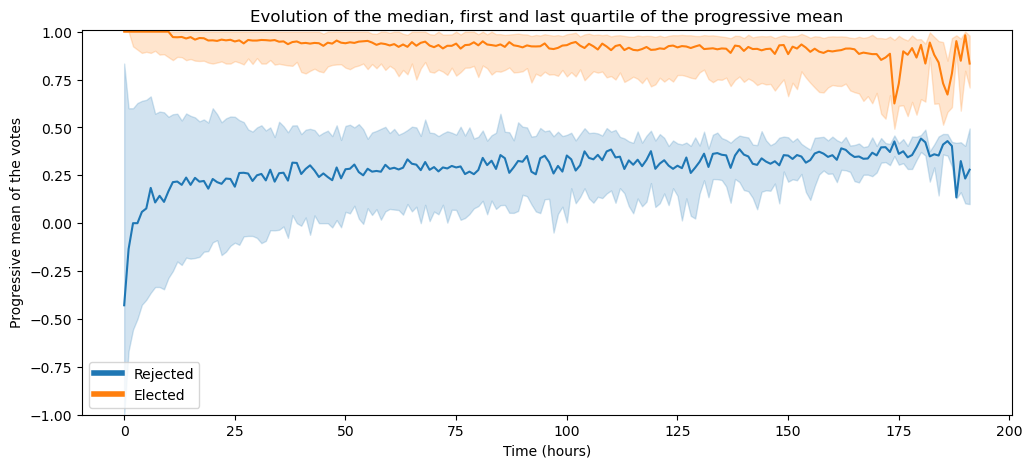

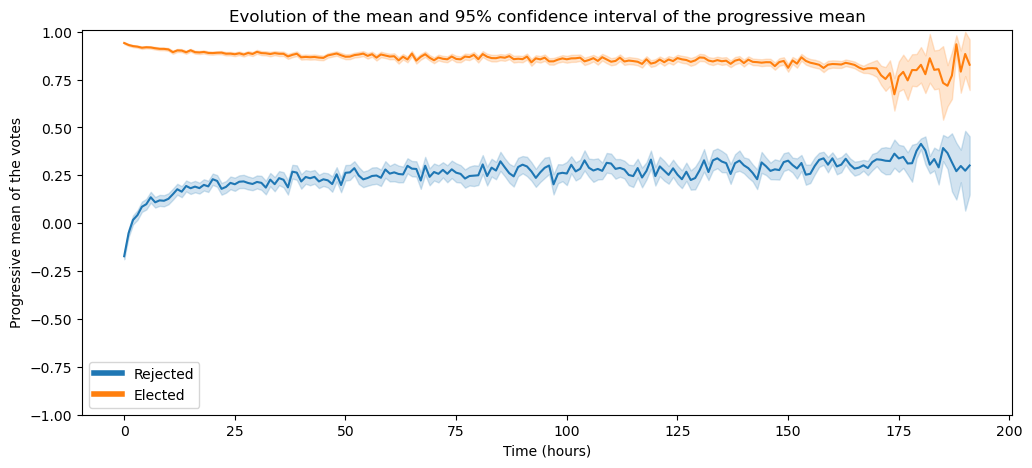

In [7]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.savefig('Figures/median_quartiles_over_time.png')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.savefig('Figures/mean_ci_over_time.png')
plt.show()


In [16]:
vote_nb.Voting_time.max() 

Results  Vote_number
-1.0     1                       0 days 00:00:00
         2             0 days 23:49:00.000000001
         3             1 days 22:13:59.999999998
         4             2 days 03:19:59.999999998
         5                       2 days 19:21:00
                                  ...           
 1.0     272           7 days 04:11:00.000000002
         273           7 days 05:53:59.999999992
         274           7 days 06:01:59.999999998
         275           7 days 06:28:00.000000001
         276           7 days 06:47:59.999999996
Name: Voting_time, Length: 553, dtype: timedelta64[ns]

In [19]:
# Election evolution by vote number
vote_nb = df_vote_evolution.groupby(['Results', 'Vote_number'])
# Compute the median, first and last quartile
quartiles = get_quartiles(vote_nb, 'Vote_number')

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(vote_nb, 'Vote_number')

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Vote_number,lower,center,upper,Voting_time
296,1.0,20,0.850000,1.000000,1.000000,28 days 04:13:59.999999998
476,1.0,200,0.528750,0.732500,0.926250,6 days 22:45:00
516,1.0,240,0.519792,0.708333,0.900000,6 days 23:30:00
390,1.0,114,0.745614,0.885965,0.973684,12 days 06:14:00.000000002
199,-1.0,200,0.360000,0.410000,0.460000,7 days 00:00:00


,Results,Vote_number,center,sem,lower,upper
102,-1.0,103,0.327925,0.020990,0.286785,0.369065
218,-1.0,219,0.380708,0.057539,0.267932,0.493483
357,1.0,81,0.862522,0.006763,0.849268,0.875777
85,-1.0,86,0.323650,0.019275,0.285872,0.361429
113,-1.0,114,0.312018,0.024789,0.263431,0.360604


In [9]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Vote_number')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.savefig('Figures/median_quartiles_over_n_votes.png')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Vote_number')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.savefig('Figures/mean_ci_over_n_votes.png')
plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

#### Scatter plots and density

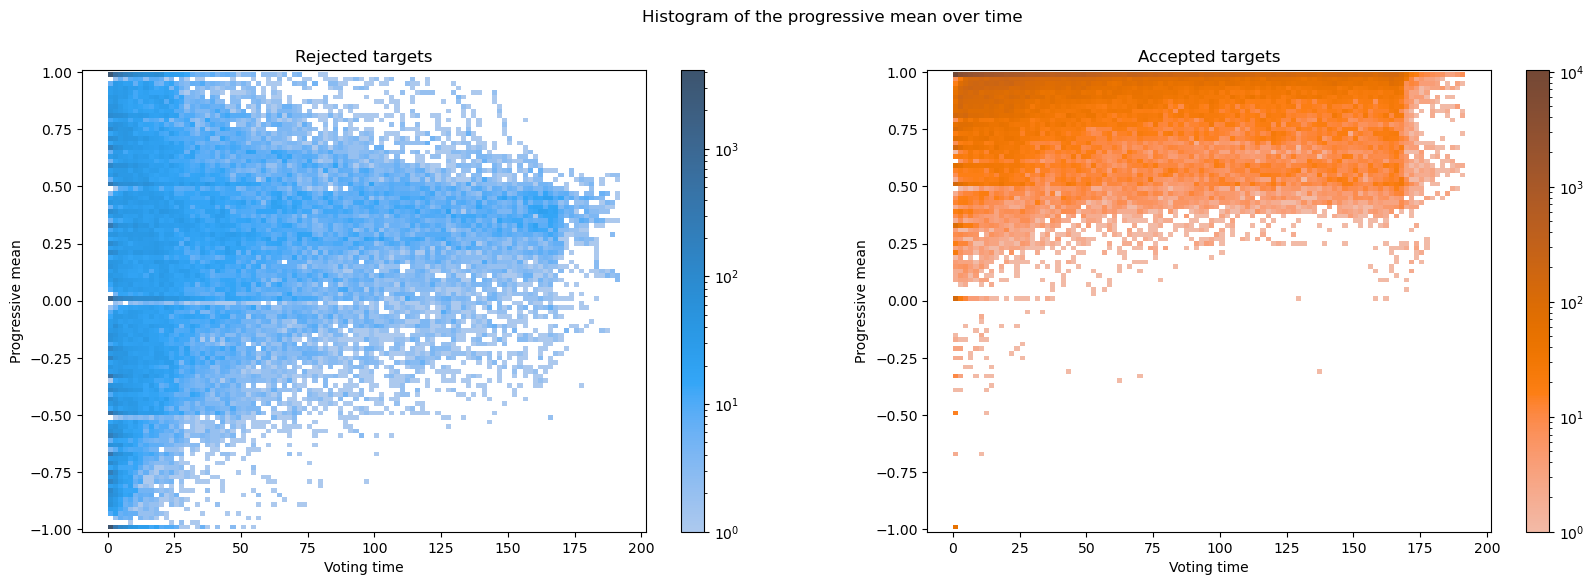

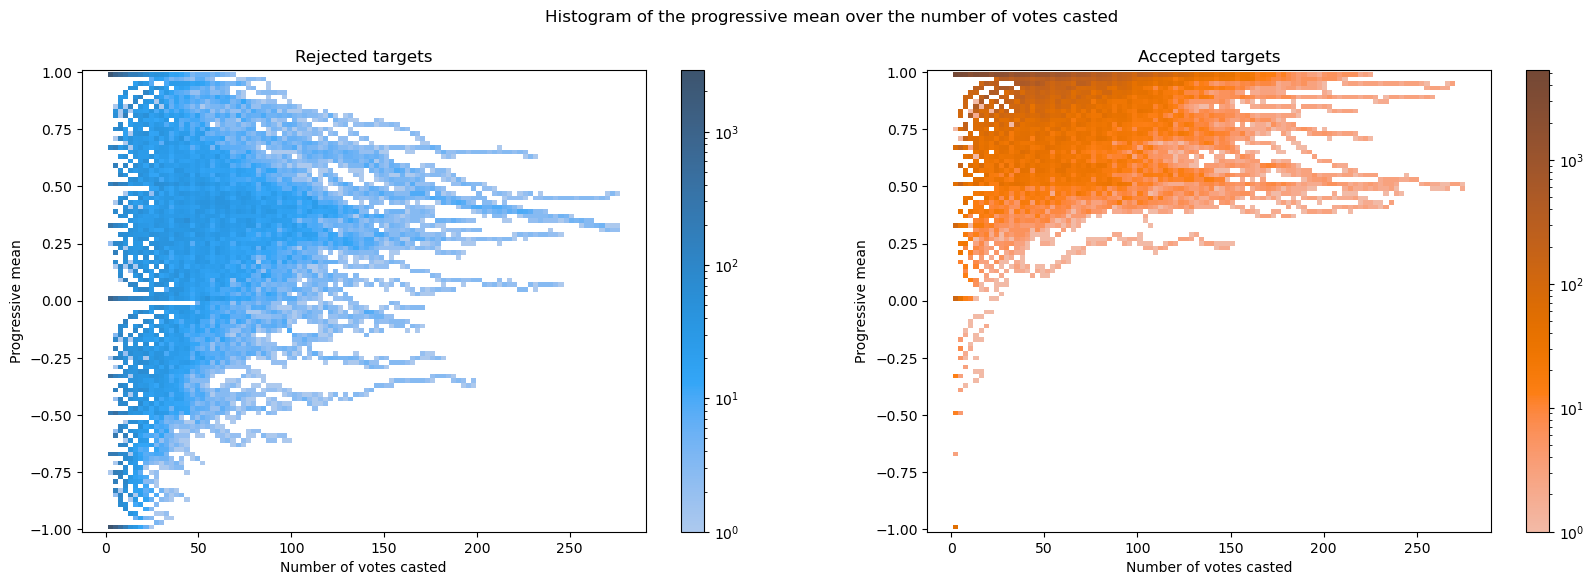

In [ ]:
plot_time_distribution(df_vote_evolution, 'Voting_time')
plot_time_distribution(df_vote_evolution, 'Vote_number')

# Prediction of the results based on early votes

In [ ]:
if False: # Takes a 40 minutes to run
    # Predict the result for each target with the first 5, 10, 15, ..., 50 votes using a gradient boosting classifier and cross validation to evaluate the performance
    nb_first_votes = np.concatenate((np.arange(1,5), np.arange(5, 71, 5)))
    scores = early_vote_prediction(df_vote_evolution, nb_first_votes, 10)
    # Save the results
    scores.to_csv('scores.csv', index=False)

  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [34:22<00:00, 114.59s/it]


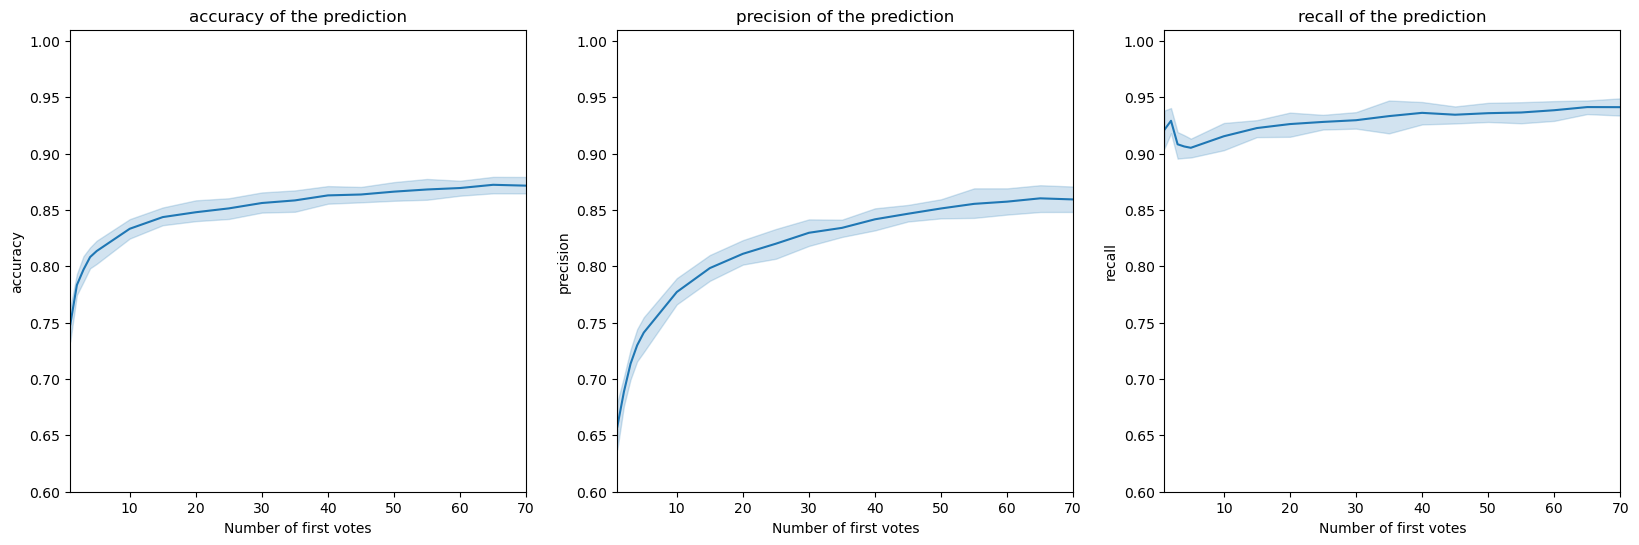

In [ ]:
scores = pd.read_csv('scores.csv')
plot_prediction_scores(scores)

# Analysis of the sources

In [ ]:
# Distribution of the number of votes per source (histogram)
def plot_vote_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title('Distribution of the number of votes per source')
    plt.show()    
plot_vote_distribution(df, 'Source')

In [ ]:
# Distribution of the number of votes per source and per round of election
def plot_vote_distribution_by_round(df, col):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=df, hue='Results', order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of the number of votes per ' + col + ' and per round of election')
    plt.show()

plot_vote_distribution_by_round(df, 'Source')